In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [152]:
# Based on pdf_1.ncl
a   = np.random.normal(0, 50, (64, 128))
b   = np.random.chisquare(2, 1000)
c   = np.random.gamma(scale=1/75,shape=2, size=(50, 100)) 


# CHI 

Note the NCL function is for a Chi distribution, but the numpy one is for Chi-Squared.

# GAMMA
The gamma distribution is slightly different between NCL and numpy. It looks like NCL's location parameter is the inverse of Numpy's scale parameter.

NCL uses Fortran code that says the density is:

    (A**R)/Gamma(R) * X**(R-1) * Exp(-A*X)
    
where A is the shape parameter and R is the location parameter. Whereas Numpy's documentation says the probability density for the Gamma distribution is

\begin{equation}
    p(x) = x^{k-1}\frac{e^{-x/\theta}}{\theta^k\Gamma(k)}
\end{equation}

where k is the shape and \theta the scale, and \Gamma is the Gamma function.



In [153]:
# construct the distribution.... 

# simplest way is to histogram:

# analogous to NCL:
# ap  = pdfx(a, 0, False)    ; default number of bins
# bp  = pdfx(b, 0, False)   
# cp  = pdfx(c, 0, False)   
# pdfx returns values in percent. with default 25 bins


ah1, ah1_bin_edges = np.histogram(a, bins=25, density=True)  # density=True means the INTEGRAL is 1 ... NOT the sum unless bin width=1
bh1, bh1_bin_edges = np.histogram(b, bins=25, density=True)
ch1, ch1_bin_edges = np.histogram(c, bins=25, density=True)

# can get the bin centers: [left_edge] + 0.5*bin_width
ah1_centers = ah1_bin_edges[0:-1] + 0.5*(ah1_bin_edges[1:] - ah1_bin_edges[0:-1])
bh1_centers = bh1_bin_edges[0:-1] + 0.5*(bh1_bin_edges[1:] - bh1_bin_edges[0:-1])
ch1_centers = ch1_bin_edges[0:-1] + 0.5*(ch1_bin_edges[1:] - ch1_bin_edges[0:-1])

In [154]:
ah1_centers

array([-209.50879445, -193.6538537 , -177.79891295, -161.9439722 ,
       -146.08903145, -130.2340907 , -114.37914995,  -98.5242092 ,
        -82.66926845,  -66.81432771,  -50.95938696,  -35.10444621,
        -19.24950546,   -3.39456471,   12.46037604,   28.31531679,
         44.17025754,   60.02519829,   75.88013903,   91.73507978,
        107.59002053,  123.44496128,  139.29990203,  155.15484278,
        171.00978353])

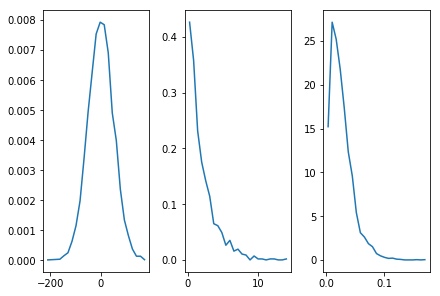

In [155]:
# Visualize the distributions
fig, ax = plt.subplots(ncols=3, constrained_layout=True)
ax[0].plot(ah1_centers, ah1)
ax[1].plot(bh1_centers, bh1)
ax[2].plot(ch1_centers, ch1)

In [156]:
# Show that the integrals are 1:
def dist_integral(dens, bin_edges):
    dx = bin_edges[1:] - bin_edges[0:-1]
    return np.sum(dens * dx)


a_int = dist_integral(ah1, ah1_bin_edges)
b_int = dist_integral(bh1, bh1_bin_edges)
c_int = dist_integral(ch1, ch1_bin_edges)

print(f"The integral of the Normal distribution: {a_int}\n The integral of the $\Chi^2$ distribution: {b_int}\n The integral of the gamma distribution: {c_int}")

The integral of the Normal distribution: 1.0
 The integral of the $\Chi^2$ distribution: 1.0
 The integral of the gamma distribution: 0.9999999999999999


Text(0, 0.5, 'PDF (%)')

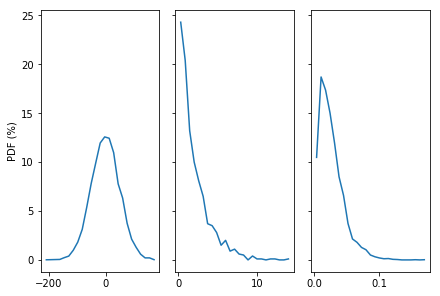

In [157]:
# To convert to just the percentage, you just plot the density times the bin width; which is what we summed to get 1.
fig, ax = plt.subplots(ncols=3, constrained_layout=True, sharey=True)
ax[0].plot(ah1_centers, ah1*(ah1_bin_edges[1:] - ah1_bin_edges[0:-1])*100)
ax[1].plot(bh1_centers, bh1*(bh1_bin_edges[1:] - bh1_bin_edges[0:-1])*100)
ax[2].plot(ch1_centers, ch1*(ch1_bin_edges[1:] - ch1_bin_edges[0:-1])*100)
ax[0].set_ylabel("PDF (%)")

# Kernel Density Estimate

Another way to estimate the density is to use a kernel density estimate. This usually results in a smoother estimate of the distribution than a simple histogram. Here we can use a Gaussian KDE from SciPy and compare with the density estimate from the histograms. You can see they are pretty similar, but the KDEs are smoother. I used the bin centers to evaluate the KDE, but you could use many more ponts to make the curves even more smooth. 

In [158]:
from scipy import stats

a_kernel = stats.gaussian_kde(a.ravel())
b_kernel = stats.gaussian_kde(b.ravel())
c_kernel = stats.gaussian_kde(c.ravel())

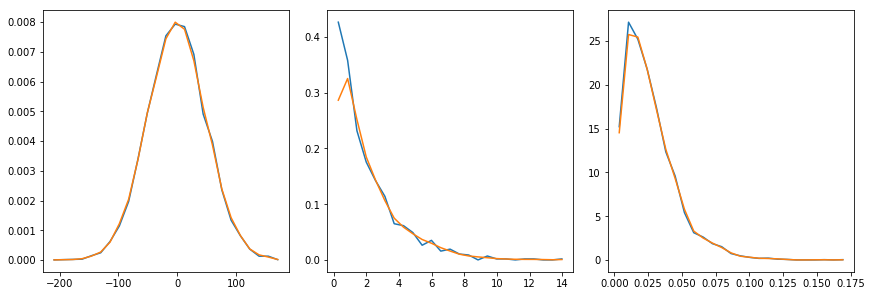

In [159]:
# Visualize the distributions
fig, ax = plt.subplots(figsize=(12,4), ncols=3, constrained_layout=True)
ax[0].plot(ah1_centers, ah1)
ax[0].plot(ah1_centers, a_kernel.evaluate(ah1_centers))


ax[1].plot(bh1_centers, bh1)
ax[1].plot(bh1_centers, b_kernel.evaluate(bh1_centers))

ax[2].plot(ch1_centers, ch1)
ax[2].plot(ch1_centers, c_kernel.evaluate(ch1_centers))

In [210]:
# pdf_2.ncl
# Not much interesting in this second example. 

# Generate data of different sizes:
a2   = np.random.normal(  0, 75, 1000)
b2   = np.random.normal( 25, 20, (10, 40))
c2   = np.random.normal(  5, 50, 500)

# NCL example uses 40 bins to build the 3 pdfs.
# Spice things up. Let's use 40 bins on the first one.
# Second one, let's specify some non-uniform bins
# Third one, let's just make our own very simple histogram


ah2, ah2_bin_edges = np.histogram(a2, bins=40, density=True)  # density=True means the INTEGRAL is 1 ... NOT the sum unless bin width=1

bbins = [-100, -50, -25, -15, -10, -5, 0, 5, 10, 15, 25, 50, 60, 70,  80, 200]
bh2, bh2_bin_edges = np.histogram(b2, bins=bbins, density=True) # If bins is a string, it defines the method used to calculate the optimal bin width, as defined by histogram_bin_edges.
# NOTE: The histogram is computed over the flattened array.
ch2_bin_edges = np.linspace(c2.min(), c2.max(), 40)
ch2 = np.zeros( len(ch2_bin_edges)-1)
for i in range(len(ch2_bin_edges)-1):
#     print(f"i = {i}, checking for {ch2_bin_edges[i]} <= x < {ch2_bin_edges[i+1]}")
    ch2[i] = np.sum(np.where((c2 >= ch2_bin_edges[i]) & (c2 < ch2_bin_edges[i+1]), 1, 0))
# normalize ch2 to convert from counts to fraction:
print(ch2)
print(f"The sum of the ch2 is : {ch2.sum()}, the length is {c2.shape}")
ch2 /= c2.shape[0]
print(ch2)

[ 1.  0.  0.  0.  0.  2.  3.  1.  2.  4.  6.  6. 15. 15. 21. 29. 30. 31.
 32. 43. 42. 37. 28. 26. 22. 22. 18. 15. 14.  7.  6.  6.  6.  6.  1.  1.
  1.  0.  0.]
The sum of the ch2 is : 499.0, the length is (500,)
[0.002 0.    0.    0.    0.    0.004 0.006 0.002 0.004 0.008 0.012 0.012
 0.03  0.03  0.042 0.058 0.06  0.062 0.064 0.086 0.084 0.074 0.056 0.052
 0.044 0.044 0.036 0.03  0.028 0.014 0.012 0.012 0.012 0.012 0.002 0.002
 0.002 0.    0.   ]


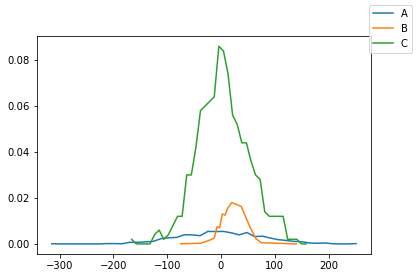

In [211]:
ah2_ctr = ah2_bin_edges[0:-1] + 0.5*(ah2_bin_edges[1:] - ah2_bin_edges[0:-1])
bh2_ctr = bh2_bin_edges[0:-1] + 0.5*(bh2_bin_edges[1:] - bh2_bin_edges[0:-1])
ch2_ctr = ch2_bin_edges[0:-1] + 0.5*(ch2_bin_edges[1:] - ch2_bin_edges[0:-1])


fig2, ax2 = plt.subplots()
ax2.plot(ah2_ctr, ah2, label="A")
ax2.plot(bh2_ctr, bh2, label="B")
ax2.plot(ch2_ctr, ch2, label="C")
fig2.legend()

Text(0, 0.5, 'PDF (%)')

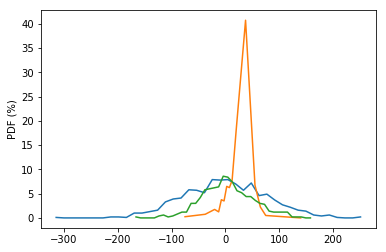

In [212]:
# To be fair, let's make sure we do everything as percent
# To convert to just the percentage, you just plot the density times the bin width; which is what we summed to get 1.
fig2a, ax2a = plt.subplots()
ax2a.plot(ah2_ctr, ah2*(ah2_bin_edges[1:] - ah2_bin_edges[0:-1])*100)
ax2a.plot(bh2_ctr, bh2*(bh2_bin_edges[1:] - bh2_bin_edges[0:-1])*100)
ax2a.plot(ch2_ctr, ch2*100) # already in fraction, bin width didn't matter
ax2a.set_ylabel("PDF (%)")

Text(0, 0.5, 'PDF (%)')

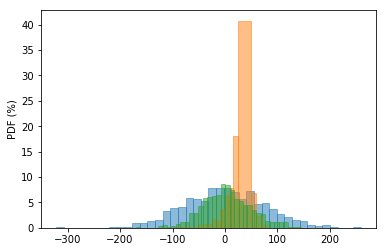

In [213]:
# Since we have uneven bins, maybe better to do this as a bar chart
fig2b, ax2b = plt.subplots()
ax2b.bar(ah2_ctr, ah2*(ah2_bin_edges[1:] - ah2_bin_edges[0:-1])*100, width=(ah2_bin_edges[1:] - ah2_bin_edges[0:-1]), alpha=.5, edgecolor='C0')
ax2b.bar(bh2_ctr, bh2*(bh2_bin_edges[1:] - bh2_bin_edges[0:-1])*100, width=(bh2_bin_edges[1:] - bh2_bin_edges[0:-1]), alpha=.5, edgecolor='C1')
ax2b.bar(ch2_ctr, ch2*100, width=(ch2_bin_edges[1:] - ch2_bin_edges[0:-1]), alpha=.5, edgecolor='C2')
ax2b.set_ylabel("PDF (%)")

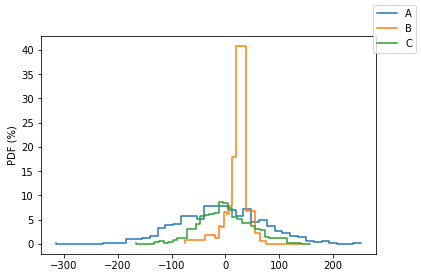

In [214]:
# To mimic the "stepped" or "outlined" style of NCL, two options:
# Use Matplotlib's plt.hist() with kwarg histtype : {'bar', 'barstacked', 'step', 'stepfilled'} set to 'step'

# Or make the line step using drawstyle
fig2c, ax2c = plt.subplots()
ax2c.plot(ah2_ctr, ah2*(ah2_bin_edges[1:] - ah2_bin_edges[0:-1])*100, drawstyle='steps', label='A')
ax2c.plot(bh2_ctr, bh2*(bh2_bin_edges[1:] - bh2_bin_edges[0:-1])*100, drawstyle='steps', label='B')
ax2c.plot(ch2_ctr, ch2*100,  drawstyle='steps', label='C')
ax2c.set_ylabel("PDF (%)")
fig2c.legend()

# NOTE: you can change where the step is with steps-pre, steps-mid, steps-post; I didn't confirm that we chose the right one here.


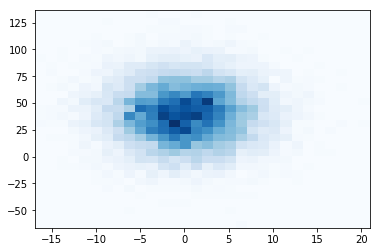

In [240]:
# 2-dimensions
# pdf_3.ncl

xvals = np.random.normal(0, 5, 10000)
yvals = np.random.normal(40, 25, 10000)

# simplest, let matplotlib just do it:
fig3a, ax3a = plt.subplots()
ax3a.hist2d(xvals, yvals, bins=30, cmap='Blues');


In [241]:
# More control using numpy
counts, xedges, yedges = np.histogram2d(xvals, yvals, bins=30, density=False)

In [242]:
xcenter = xedges[0:-1]+0.5*(xedges[1]-xedges[0])
ycenter = yedges[0:-1]+0.5*(yedges[1]-yedges[0])
xgrid, ygrid = np.meshgrid(xcenter, ycenter)

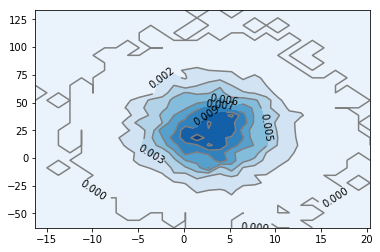

In [248]:
fig3b, ax3b = plt.subplots()
img = ax3b.contourf(xgrid, ygrid, counts/len(xvals.flatten()), cmap='Blues')
ctr = ax3b.contour(xgrid, ygrid, counts/len(xvals.flatten()), colors='gray')
clbs = ax3b.clabel(ctr, fontsize=10, colors='black', inline=True, fmt='%1.3f')